In [186]:
! pip install rdkit

In [187]:
import pandas as pd

In [188]:
#load bioactivity data
df = pd.read_csv('bioactivity_preprocessed_data.csv')

calculate lipinski descriptors

In [189]:
#discriptor calculation
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [190]:
#fixed lipnski function
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np
import pandas as pd

def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        if isinstance(elem, str):  # Ensure the input is a string
            mol = Chem.MolFromSmiles(elem)
            if mol is not None:  # Ensure the SMILES string is valid
                moldata.append(mol)
            elif verbose:
                print(f"Invalid SMILES string: {elem}")
        else:
            if verbose:
                print(f"Skipping non-string value: {elem}")

    if not moldata:  # If no valid molecules, return an empty DataFrame
        return pd.DataFrame(columns=["MW", "LogP", "NumHDonors", "NumHAcceptors"])

    baseData = []
    for mol in moldata:
        try:
            desc_mol_wt = Descriptors.MolWt(mol)
            desc_mol_logp = Descriptors.MolLogP(mol)
            desc_mol_numHDonors = Lipinski.NumHDonors(mol)
            desc_mol_numHAcceptors = Lipinski.NumHAcceptors(mol)
            row = [desc_mol_wt, desc_mol_logp, desc_mol_numHDonors, desc_mol_numHAcceptors]
            baseData.append(row)
        except Exception as e:
            if verbose:
                print(f"Error processing molecule: {e}")

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors


In [191]:
df_lipinski = lipinski(df['Smiles'])

In [192]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,626.713,6.19456,2,7
1,567.716,1.49827,3,7
2,665.820,3.44167,3,7
3,589.722,1.87127,3,7
4,564.767,5.94400,2,5
...,...,...,...,...
585,757.951,3.89510,3,9
586,347.378,2.64844,5,4
587,579.727,1.64077,3,7
588,508.623,1.51020,2,8


In [193]:
df

,Molecule ChEMBL ID,Smiles,Standard Value,bioactivity_class
0,CHEMBL134816,CC(C)(C(=O)OC(=O)C(C)(C)C(NC(=O)c1ccc(C#N)cc1)...,1800.0,intermediate
1,CHEMBL402843,C[C@H]1C(=O)N(CCCc2ccccc2)CC(=O)N1CC(=O)N[C@@H...,24000.0,inactive
2,CHEMBL79245,N=C(N)N1CCCC(C[C@H](NC(=O)CN2C(=O)CN(Cc3ccccc3...,11100.0,inactive
3,CHEMBL84127,CN1CC(=O)N(CC(=O)N[C@@H](CC2CCCN(C(=N)N)C2)C(=...,26600.0,inactive
4,CHEMBL436591,CCCC(=O)NC(CCc1ccccc1)C(C)(C)C(=O)OC(=O)C(C)(C...,1800.0,intermediate
...,...,...,...,...
585,CHEMBL4525964,CC[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)[...,10000.0,inactive
586,CHEMBL273264,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1,17.0,active
587,CHEMBL332716,N=C(N)N1CCCC(C[C@H](NC(=O)[C@@H]2CC[C@H]3CN(C(...,4360.0,intermediate
588,CHEMBL4475942,CNC(=O)[C@@H]1C[C@H](N2CCc3c(ncnc3OCCC3CC3)C2)...,6.0,active


In [194]:
#combining 2 dfs
df_Combined = pd.concat([df,df_lipinski], axis=1)

In [195]:
df_Combined

,Molecule ChEMBL ID,Smiles,Standard Value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL134816,CC(C)(C(=O)OC(=O)C(C)(C)C(NC(=O)c1ccc(C#N)cc1)...,1800.0,intermediate,626.713,6.19456,2,7
1,CHEMBL402843,C[C@H]1C(=O)N(CCCc2ccccc2)CC(=O)N1CC(=O)N[C@@H...,24000.0,inactive,567.716,1.49827,3,7
2,CHEMBL79245,N=C(N)N1CCCC(C[C@H](NC(=O)CN2C(=O)CN(Cc3ccccc3...,11100.0,inactive,665.820,3.44167,3,7
3,CHEMBL84127,CN1CC(=O)N(CC(=O)N[C@@H](CC2CCCN(C(=N)N)C2)C(=...,26600.0,inactive,589.722,1.87127,3,7
4,CHEMBL436591,CCCC(=O)NC(CCc1ccccc1)C(C)(C)C(=O)OC(=O)C(C)(C...,1800.0,intermediate,564.767,5.94400,2,5
...,...,...,...,...,...,...,...,...
585,CHEMBL4525964,CC[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)[...,10000.0,inactive,757.951,3.89510,3,9
586,CHEMBL273264,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1,17.0,active,347.378,2.64844,5,4
587,CHEMBL332716,N=C(N)N1CCCC(C[C@H](NC(=O)[C@@H]2CC[C@H]3CN(C(...,4360.0,intermediate,579.727,1.64077,3,7
588,CHEMBL4475942,CNC(=O)[C@@H]1C[C@H](N2CCc3c(ncnc3OCCC3CC3)C2)...,6.0,active,508.623,1.51020,2,8


#convert IC50 to pIC50
to allow IC50 data to be more uniformly distributed,we will convert IC50 to the negative log scale which is essentially log10(1000)

In [196]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [197]:
df_Combined['Standard Value'].describe()

count        590.000000
mean       17883.520695
std        69725.778391
min            0.020000
25%           27.250000
50%         1055.000000
75%        10000.000000
max      1000000.000000
Name: Standard Value, dtype: float64

In [198]:
-np.log10((10**-9)*100000000)

1.0

In [199]:
-np.log10((10**-9)*10000000000)

-1.0

In [200]:
def norm_value(input):
    norm = []

    for i in input['Standard Value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
    input['standard_value_norm'] = norm
    x = input.drop('Standard Value', axis=1)
    return x

In [201]:
df_norm = norm_value(df_Combined)
df_norm

,Molecule ChEMBL ID,Smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL134816,CC(C)(C(=O)OC(=O)C(C)(C)C(NC(=O)c1ccc(C#N)cc1)...,intermediate,626.713,6.19456,2,7,1800.0
1,CHEMBL402843,C[C@H]1C(=O)N(CCCc2ccccc2)CC(=O)N1CC(=O)N[C@@H...,inactive,567.716,1.49827,3,7,24000.0
2,CHEMBL79245,N=C(N)N1CCCC(C[C@H](NC(=O)CN2C(=O)CN(Cc3ccccc3...,inactive,665.820,3.44167,3,7,11100.0
3,CHEMBL84127,CN1CC(=O)N(CC(=O)N[C@@H](CC2CCCN(C(=N)N)C2)C(=...,inactive,589.722,1.87127,3,7,26600.0
4,CHEMBL436591,CCCC(=O)NC(CCc1ccccc1)C(C)(C)C(=O)OC(=O)C(C)(C...,intermediate,564.767,5.94400,2,5,1800.0
...,...,...,...,...,...,...,...,...
585,CHEMBL4525964,CC[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)[...,inactive,757.951,3.89510,3,9,10000.0
586,CHEMBL273264,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1,active,347.378,2.64844,5,4,17.0
587,CHEMBL332716,N=C(N)N1CCCC(C[C@H](NC(=O)[C@@H]2CC[C@H]3CN(C(...,intermediate,579.727,1.64077,3,7,4360.0
588,CHEMBL4475942,CNC(=O)[C@@H]1C[C@H](N2CCc3c(ncnc3OCCC3CC3)C2)...,active,508.623,1.51020,2,8,6.0


In [202]:
df_norm.standard_value_norm.describe()

count        590.000000
mean       17883.520695
std        69725.778391
min            0.020000
25%           27.250000
50%         1055.000000
75%        10000.000000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [203]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        pIC50_value = -np.log10(i * 1e-9)  # Convert IC50 to pIC50
        pIC50.append(pIC50_value)

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)  # Use axis=1 for columns

    return x

In [204]:
df_final = pIC50(df_norm)
df_final=df_final.dropna()


In [205]:
df_final.pIC50.describe()

count    590.000000
mean       6.336264
std        1.633737
min        3.000000
25%        5.000000
50%        5.977143
75%        7.564653
max       10.698970
Name: pIC50, dtype: float64

In [206]:
# Count the number of rows with "intermediate" in the bioactivity_class column
intermediate_count = df[df['bioactivity_class'] == 'intermediate'].shape[0]
intermediate_count


115

In [207]:
#removing the intermediate bioactivity classes
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class.to_csv('bioactivity _data_pIC50.csv')
df_2class

,Molecule ChEMBL ID,Smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL402843,C[C@H]1C(=O)N(CCCc2ccccc2)CC(=O)N1CC(=O)N[C@@H...,inactive,567.716,1.49827,3,7,4.619789
2,CHEMBL79245,N=C(N)N1CCCC(C[C@H](NC(=O)CN2C(=O)CN(Cc3ccccc3...,inactive,665.820,3.44167,3,7,4.954677
3,CHEMBL84127,CN1CC(=O)N(CC(=O)N[C@@H](CC2CCCN(C(=N)N)C2)C(=...,inactive,589.722,1.87127,3,7,4.575118
5,CHEMBL110898,CC(C)(C)OC(=O)N[C@@H](C(=O)N1CCC[C@H]1C(=O)NC(...,active,538.649,2.13390,4,6,7.853872
6,CHEMBL320098,C[C@@H](C(=O)N1CCC[C@H]1C(=O)NC(C=O)CCCN=C(N)N...,active,387.484,0.51840,3,4,6.050610
...,...,...,...,...,...,...,...,...
584,CHEMBL231813,CCC[C@H](NC(=O)[C@@H]1[C@H]2CCC[C@H]2CN1C(=O)[...,inactive,679.863,2.44590,4,8,5.000000
585,CHEMBL4525964,CC[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)[...,inactive,757.951,3.89510,3,9,5.000000
586,CHEMBL273264,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1,active,347.378,2.64844,5,4,7.769551
588,CHEMBL4475942,CNC(=O)[C@@H]1C[C@H](N2CCc3c(ncnc3OCCC3CC3)C2)...,active,508.623,1.51020,2,8,8.221849


Exploratory data analysis, using Lipinski descriptors - Chemical space analysis

In [208]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

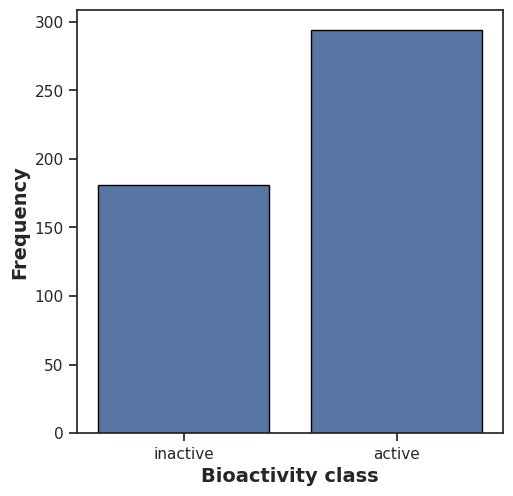

In [209]:
#frequency plot of the 2 bioactivity classes
plt.figure(figsize=(5.5,5.5))

sns.countplot(x = 'bioactivity_class',data=df_2class,edgecolor='black')

plt.xlabel('Bioactivity class',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.savefig('plot_bioactivity_class.pdf')


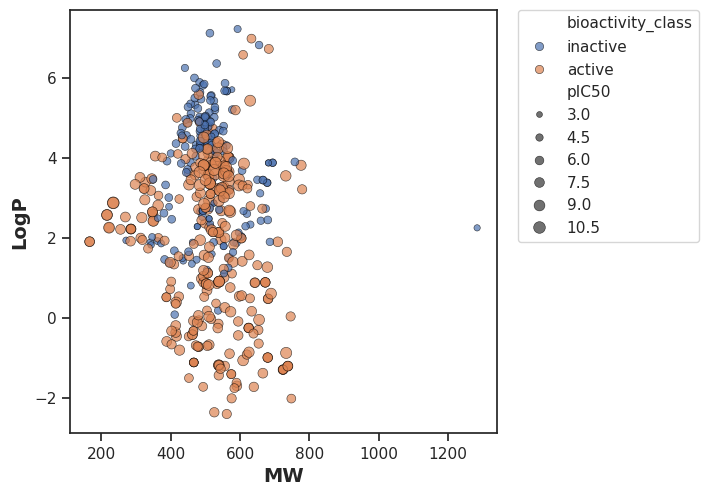

In [210]:
#scatterplot of MW v logP
plt.figure(figsize=(5.5,5.5))

sns.scatterplot(x='MW', y='LogP',data=df_2class,hue='bioactivity_class', size='pIC50',edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14,fontweight='bold')
plt.ylabel('LogP',fontsize=14,fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

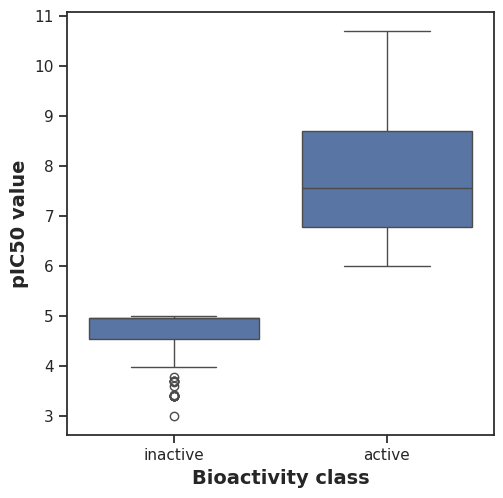

In [211]:
#Box plot for pIC50 value

plt.figure(figsize=(5.5,5.5))

sns.boxplot(x = 'bioactivity_class', y='pIC50', data=df_2class)
plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_pIC50.pdf')

Statistical analysis - Mann Whitney U test

In [212]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results


mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,53214.0,3.401830e-75,0.05,Different distribution (reject H0)


In [213]:
import numpy as np
import scipy.stats as stats

# Try using numpy.char and scipy's mannwhitneyu
print(np.char.add('hello', ' world'))
result = stats.mannwhitneyu([1, 2, 3], [4, 5, 6])
print(result)


hello world
MannwhitneyuResult(statistic=0.0, pvalue=0.1)


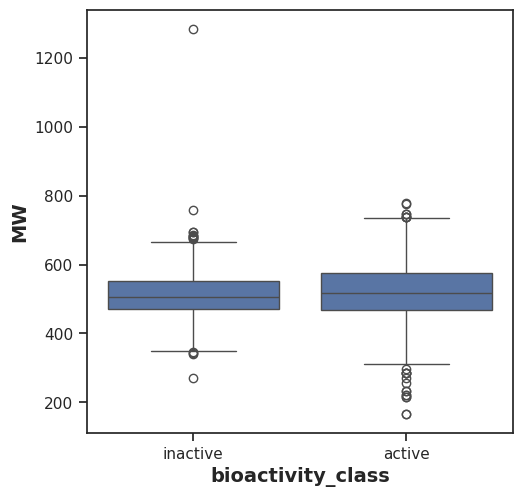

In [214]:
#for molecular weight
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data= df_2class)

plt.xlabel('bioactivity_class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [215]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,28834.5,0.125316,0.05,Same distribution (fail to reject H0)


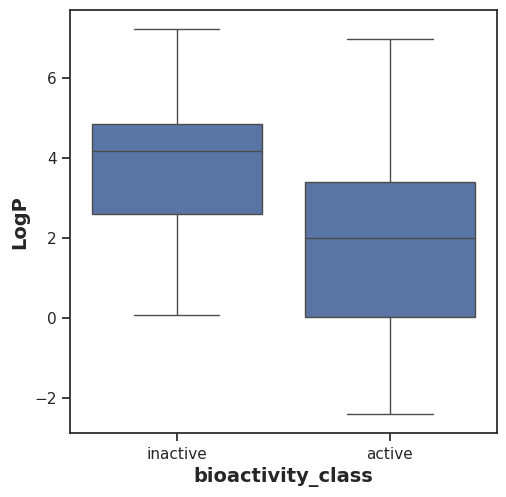

In [216]:
#logP
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('bioactivity_class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [217]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,11188.5,2.616720e-26,0.05,Different distribution (reject H0)


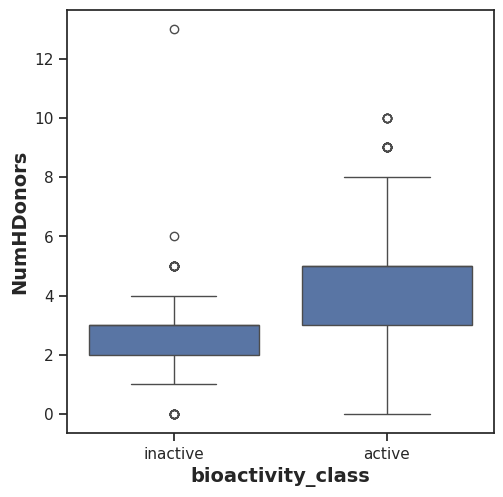

In [218]:
#NumHDonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('bioactivity_class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [219]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,41551.0,1.498055e-25,0.05,Different distribution (reject H0)


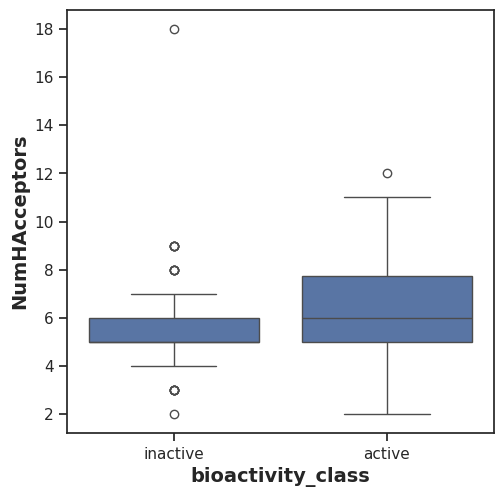

In [220]:
#NumHAcceptors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('bioactivity_class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')


In [221]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,33181.0,0.000004,0.05,Different distribution (reject H0)


In [222]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: bioactivity_data.csv (deflated 88%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: bioactivity_preprocessed_data.csv (deflated 83%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 6%)
  adding: bioactivity _data_pIC50.csv (deflated 76%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_LogP.pdf (deflated 39%)
  adding: plot_pIC50.pdf (deflated 36%)
  adding: plot_MW.pdf (deflated 39%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: plot_NumHDonors.pdf (deflated 38%)
